In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
base_dir="CNN\\"

In [3]:
train_dir=os.path.join(base_dir,'train')
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

In [4]:
validation_dir=os.path.join(base_dir,'validation')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [5]:
test_dir=os.path.join(base_dir,'test')
test_cats_dir=os.path.join(test_dir,'cats')
test_dogs_dir=os.path.join(test_dir,'dogs')

In [6]:
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

In [7]:
print(train_cat_fnames[:10])

['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']


In [8]:
print(train_dog_fnames[:10])

['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [9]:
print("total training cat images={}".format(len(os.listdir(train_cats_dir))))

total training cat images=1000


In [10]:
print("total testing cat images={}".format(len(os.listdir(test_cats_dir))))

total testing cat images=500


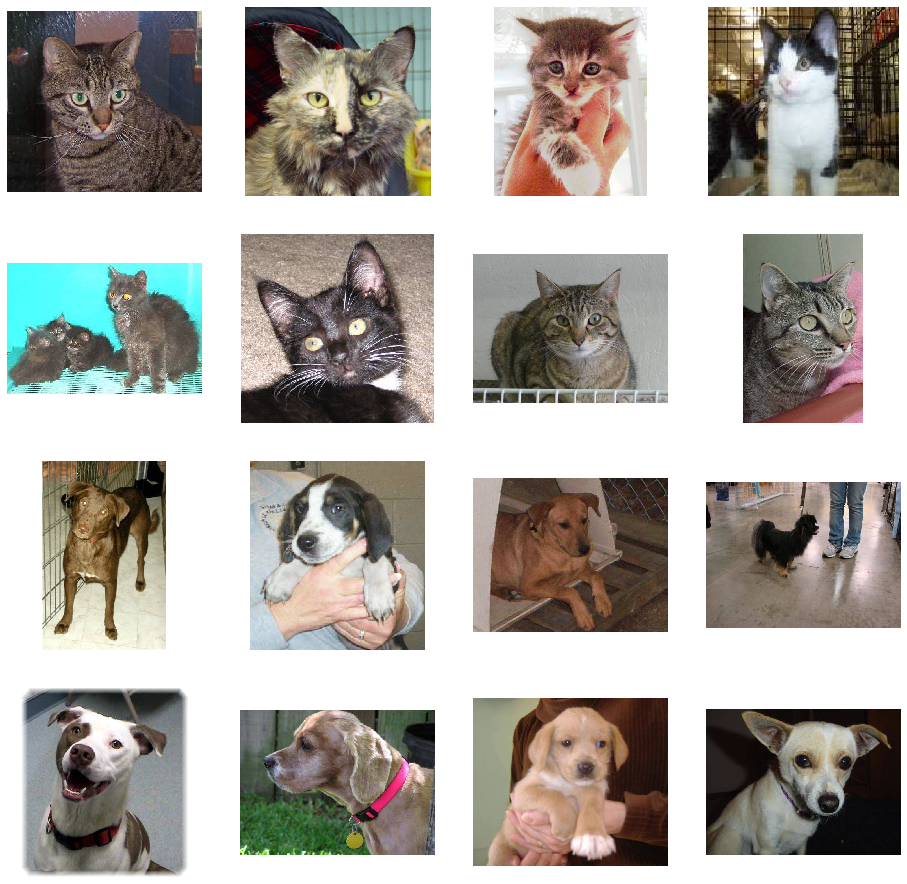

In [11]:
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [14]:

import tensorflow as tf

#or use if model definition is not running in version abovw 2.0
#from tensorflow.keras.models import Sequential
#model=Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3))

#we extratcted 16 features in first cnn layer and kernel size is (3,3) and image size is 150*150 with 3 channels
model=tf.keras.models.sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
tf.keras.layers.MaxPooling2D(2,2),#max pooling layer reduce size of feature frame we have now 75*75 feature layer
tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation="relu"), 
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128,(3,3),activation="relu"),  
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation="relu"),#512 neurons in hidden layer
tf.keras.layers.Dense(1,activation="sigmoid") #only 1 output neuron and it has range 0-1,0 for cats and 1 for dogs                                
])


In [ ]:
model.summary()#summary of the model

# COMPILING THE MODEL

In [ ]:
from tensorflow.keras.optimizer import RMSprop
#optimizers are like RMSprop ,gradient descent,SGD
model.compile(optimizer=RMSprop(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])#lr is learning rate,binary cross entropy is used for classification


# DATA PREPROCESSING

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#rescaled all images
train_datagen=ImageDataGenerator(rescale=1.0/255.)
test_datagen=ImageDataGenerator(rescale=1.0/255.)
#flow training images in batches of 20 using train_datagen generator
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode="binary",target_size=(150,150))
#flow validation images in batches of 20 using test_datagen_generator
validation_generator=test_datagen.flow_from_directory(validation_dir,batch_size=20,class_mode="binary",target_size=(150,150))


In [ ]:
#TRAINING

history=model.fit(train_generator,validation_data=validation_generator,steps_per_epoch=100,epochs=15,validation_steps=50,verbose=2)

In [ ]:
#diploy model on colab:
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fn in uploaded.keys():
    path='/content/'+fn
img=image.load_img(path,target_size=(150,150))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
classes=model.predict(images,batch_size=10)
print(classes[0])
if classes[0]>0:
    print(fn+"is a dog")
else:
    print(fn+"is a cat")

In [ ]:
model.save("mycnnmodel.h5")#to save model